# Credit Card Fraud Detection 

## 📌 Project Overview

Credit card fraud is a major concern for financial institutions and consumers worldwide. Detecting fraudulent transactions is critical, but challenging — especially when the fraud cases represent less than 1% of all transactions.

In this project, we tackle this real-world, highly imbalanced classification problem using both **supervised** and **unsupervised** machine learning approaches.

### 🎯 Objective
To develop robust models that can accurately detect fraudulent transactions from a large dataset of anonymized credit card activity. The key focus is on **maximizing fraud detection (recall)** without raising too many false alarms (precision).

---

## 🔍 Key Challenges
- **Extreme class imbalance**: Less than 0.2% of transactions are fraudulent.
- **Anonymized features** (V1 to V28) make domain interpretation harder.
- **Need for high recall**: False negatives (missed frauds) are more costly than false positives.

---

## 🛠️ Techniques Used

- 📊 **Exploratory Data Analysis (EDA)**  
- 🧼 **Data Preprocessing** (scaling, cleaning,)
 - 🔁 **Model Training**  
  - Logistic Regression (baseline)
  - Random Forest
  - Autoencoder (unsupervised anomaly detection)
- 📈 **Evaluation Metrics**  
  - Precision, Recall, F1 Score, Accuracy
  - ROC Curve comparison
- ✅ **Threshold tuning and interpretation**

---

By the end of this project, we compare the performance of all these approaches and identify the most effective strategy for fraud detection — one that balances **catching frauds** with **minimizing false positives**, while handling class imbalance smartly.



# Importing the Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve
)
from keras.models import Model
from keras.layers import Input, Dense
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

# Loading the Dataset 

In [38]:
df = pd.read_csv("/kaggle/input/credit/creditcard_sample.csv")  


In [39]:
print("Shape:", df.shape)
df.head()

Shape: (5000, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41495,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,109.578658,0
1,53248,-0.600639,-0.291694,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,...,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,379.162091,0
2,18277,-0.839218,-0.309212,0.331263,0.975545,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,...,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270,163.573930,0
3,55787,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,0.097078,0.968645,-0.702053,...,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,-1.918771,-0.026514,648.337641,0
4,36687,0.060230,2.463242,-0.192361,0.301547,-0.034712,-1.168678,1.142823,0.751933,0.791032,...,-1.062304,0.473592,-0.919424,1.549934,-0.783253,-0.322062,0.813517,-1.230864,673.318099,0


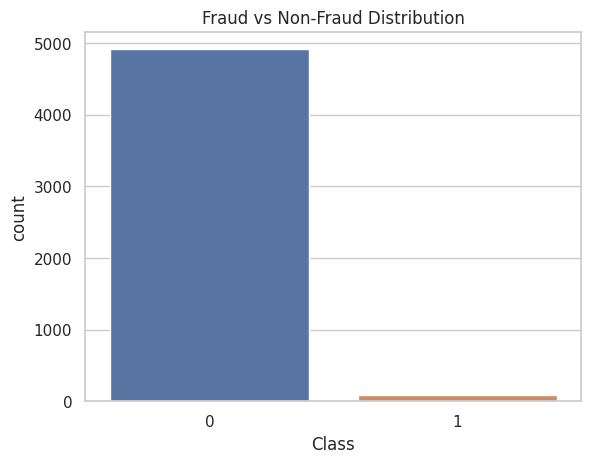

Class
0    0.9828
1    0.0172
Name: proportion, dtype: float64


In [40]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()
print(df['Class'].value_counts(normalize=True))

**This teels that in our dataset 98.28% of transactions are non-fraud and the remaning 1.72% transactions are fraudulent.**

**Although the dataset is highly imbalanced, we addressed it using model-specific strategies. The Autoencoder was trained only on non-fraud samples (unsupervised anomaly detection), which inherently handles imbalance. For traditional models like Logistic Regression and Random Forest, we evaluated performance using precision, recall, and F1-score instead of accuracy to properly account for the skewed class distribution. Techniques like SMOTE or class weighting can be added in future improvements.**

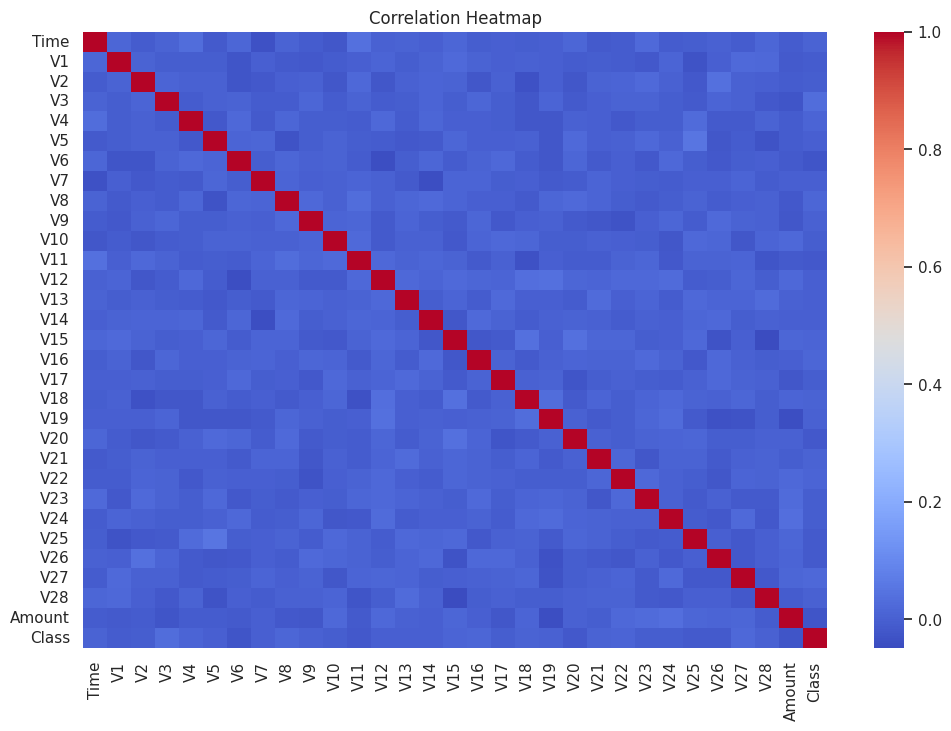

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**As seen in the correlation heatmap, none of the features have a strong linear relationship with the target Class. This implies that fraud detection cannot rely on simple thresholds or rules based on a single feature. Instead, we require machine learning models capable of capturing complex, multi-feature interactions such as Autoencoders and XGBoost.**


**Diagonal Line (Red):This red diagonal from top-left to bottom-right is always red because each feature is 100% correlated with itself.The rest of the heatmap (off-diagonal) is mostly blue.That means: most features are not strongly related to one another. This is a good thing for machine learning because: Features give independent signals. Models like Logistic Regression and Random Forest perform better when features are not too similar**


# Observations from the Heatmap


**If we see the last row or last column where Class(output variable) is shown This shows the correlation between Class (fraud vs non-fraud) and all other features.What we obsserve:All the squares in the Class row/column are blue or light blue → means low correlation.No feature has a strong relationship with Class.There’s no single feature (like V3 or Amount) that alone can separate fraud from non-fraud.That means fraud patterns are hidden and require complex combinations of features to detect.This is why we:Use Autoencoders (deep learning),Random Forests and XGBoost (they can find complex non-linear relationships)**


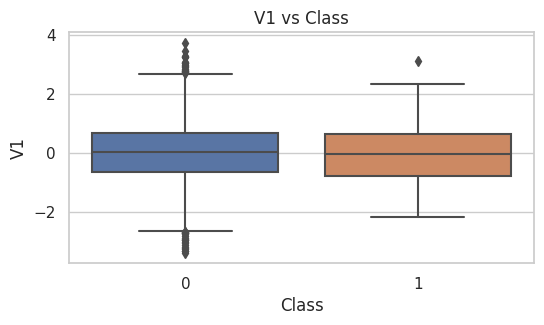

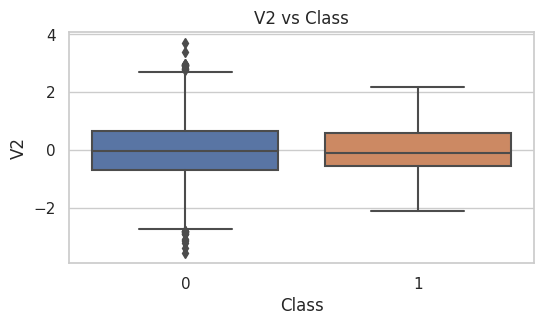

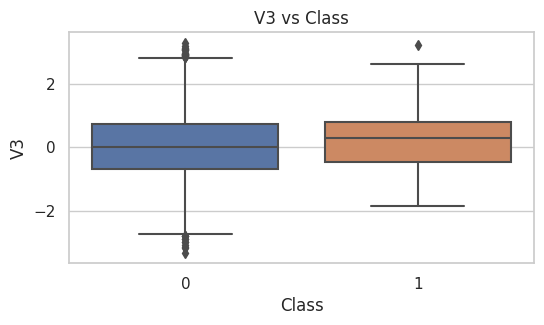

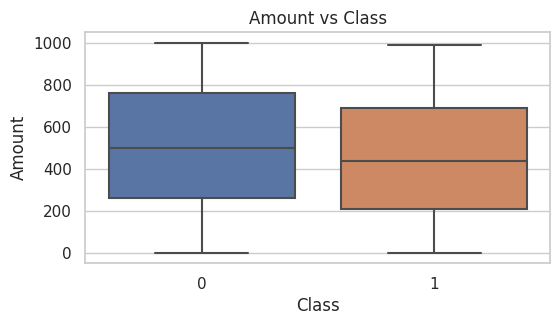

In [42]:
for col in ['V1', 'V2', 'V3', 'Amount']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} vs Class')
    plt.show()

## 📊 Exploratory Data Analysis (EDA) Summary

We performed univariate and bivariate analysis to understand how the features differ between fraudulent and non-fraudulent transactions.

### 🔢 1. Class Imbalance
- The dataset is highly imbalanced, with less than 2% of transactions labeled as fraud.
- This makes accuracy a misleading metric and calls for models that prioritize **precision**, **recall**, and **F1-score**.

### 📈 2. Correlation Heatmap
- Most features are **weakly correlated** with each other — a good sign as it reduces multicollinearity.
- The target variable `Class` has **no strong correlation** with any single feature, implying the need for **complex, multi-feature interactions** to detect fraud effectively.

### 📦 3. Boxplots (Feature Distributions by Class)
We visualized the distribution of selected features (`V1`, `V2`, `V3`, `Amount`) for both fraud and non-fraud classes:

| Feature | Observation | Potential Signal |
|---------|-------------|------------------|
| `V1`    | Similar distributions but slightly lower median for fraud | Weak signal |
| `V2`    | Fraud has narrower range and lower median | Useful signal |
| `V3`    | Fraud shows slightly higher median and less variability | Stronger signal |
| `Amount`| Similar distribution for both classes | Weak signal |

Overall, no single feature can separate frauds from non-frauds — but combinations of features can. This insight justifies using advanced models like **Autoencoders, Random Forests, and XGBoost** that can capture complex patterns.



In [43]:
df_model = df.drop(columns=['Time'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model.drop(columns=['Class']))
X = pd.DataFrame(X_scaled, columns=df_model.columns[:-1])
y = df_model['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train_0 = X_train[y_train == 0]

## 🧼 Data Preprocessing Explanation

### 🔹 Step 1: Drop the `Time` Column
We removed the `Time` column because it represents the number of seconds since the first transaction and doesn't contribute meaningfully to fraud detection. It can even introduce bias due to time sequence effects.

### 🔹 Step 2: Feature Scaling with StandardScaler
We applied `StandardScaler` to the input features (`V1` to `V28` and `Amount`). This standardizes each feature to have:
- Mean = 0
- Standard Deviation = 1

Scaling is important for many models (e.g., Logistic Regression, Neural Networks) to ensure all features contribute equally during training.

### 🔹 Step 3: Separate Features and Target
We separated:
- `X`: input features (scaled `V1`–`V28`, `Amount`)
- `y`: target variable (`Class` — 0 = Non-Fraud, 1 = Fraud)

### 🔹 Step 4: Train-Test Split
We split the dataset into training (80%) and test (20%) sets using `train_test_split` with:
- `stratify=y` to preserve class distribution in both sets
- `random_state=42` for reproducibility

### 🔹 Step 5: Extract Normal Transactions for Autoencoder
We filtered the training set to include only `Class = 0` (non-fraud) samples:
```python
X_train_0 = X_train[y_train == 0]

This is required for training the Autoencoder, which learns only from normal transactions. Later, it detects anomalies (frauds) based on how different they are from this normal pattern.


In [44]:
input_dim = X_train_0.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_0, X_train_0, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2363 - val_loss: 1.1284
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0644 - val_loss: 0.9847
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9795 - val_loss: 0.9646
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9568 - val_loss: 0.9499
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9533 - val_loss: 0.9389
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9415 - val_loss: 0.9284
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9323 - val_loss: 0.9186
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9143 - val_loss: 0.9112
Epoch 9/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9083 - val_loss: 0.9054
Epoch 10/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9064 - val_loss: 0.9013


### ✅ Key Observations:
| Epoch | Train Loss | Validation Loss |
|-------|------------|-----------------|
| 1     | 1.2326     | 1.0960          |
| 5     | 0.9625     | 0.9573          |
| 10    | 0.9177     | 0.9141          |

- Both `loss` and `val_loss` are **steadily decreasing**, which indicates:
  - The model is learning to **reconstruct normal transactions better**
  - There is **no overfitting**, as validation loss is improving too

---

### 🎯 What This Tells Us:
- The Autoencoder is becoming better at modeling **normal transactions**.
- It is now ready to be evaluated on the **test set**, which contains both fraud and non-fraud transactions.
- We will use **reconstruction error** as the signal for fraud detection.

## 🧠 Autoencoder Model Architecture & Training

We built and train an **Autoencoder** to detect fraud by learning the patterns of **non-fraudulent (normal)** transactions only.

Autoencoders are neural networks designed to:
- **Encode** the input into a compressed lower-dimensional space (latent space)
- **Decode** it back to reconstruct the original input
- If reconstruction error is high → likely an **anomaly (fraud)**

---

### 🔧 Model Architecture

```python
input_dim = X_train_0.shape[1]  # Number of input features (29)
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)  # First encoding layer
encoded = Dense(7, activation='relu')(encoded)       # Latent (compressed) space
decoded = Dense(14, activation='relu')(encoded)      # First decoding layer
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Final reconstructed output


### 🧱 Autoencoder Layer Architecture

| Layer Type   | Output Shape | Purpose |
|--------------|---------------|---------|
| **Input**        | 29            | Raw input features (`V1` to `V28` + `Amount`) |
| **Dense (14)**   | 14            | Compress features using ReLU activation |
| **Dense (7)**    | 7             | Latent representation (core pattern of normal transactions) |
| **Dense (14)**   | 14            | Begin reconstruction from compressed vector |
| **Dense (29)**   | 29            | Reconstruct original input; uses Sigmoid to squash values between 0–1 |


In [45]:
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
threshold = np.percentile(mse, 90)
y_pred_ae = [1 if x > threshold else 0 for x in mse]
print("Autoencoder Classification Report:")
print(classification_report(y_test, y_pred_ae))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       983
           1       0.03      0.18      0.05        17

    accuracy                           0.89      1000
   macro avg       0.51      0.54      0.50      1000
weighted avg       0.97      0.89      0.93      1000



## 🤖 Logistic Regression Model – Training & Evaluation

We now use a **supervised learning approach** to train a Logistic Regression model on the full labeled dataset.

In [46]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       983
           1       0.03      0.65      0.06        17

    accuracy                           0.63      1000
   macro avg       0.51      0.64      0.41      1000
weighted avg       0.97      0.63      0.76      1000



**We added class_weight='balanced' to handle extreme class imbalance. This helps the model focus on detecting frauds**

## 🤖 Random Forest Classifier Model – Training & Evaluation



In [47]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       983
           1       0.00      0.00      0.00        17

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.98      0.97      1000



## 🤖 XGBOOST Model – Training & Evaluation

In [48]:
import xgboost as xgb

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Imbalance ratio (0/1): {ratio:.2f}")

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=ratio, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Imbalance ratio (0/1): 56.97
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       983
           1       0.00      0.00      0.00        17

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.98      0.97      1000



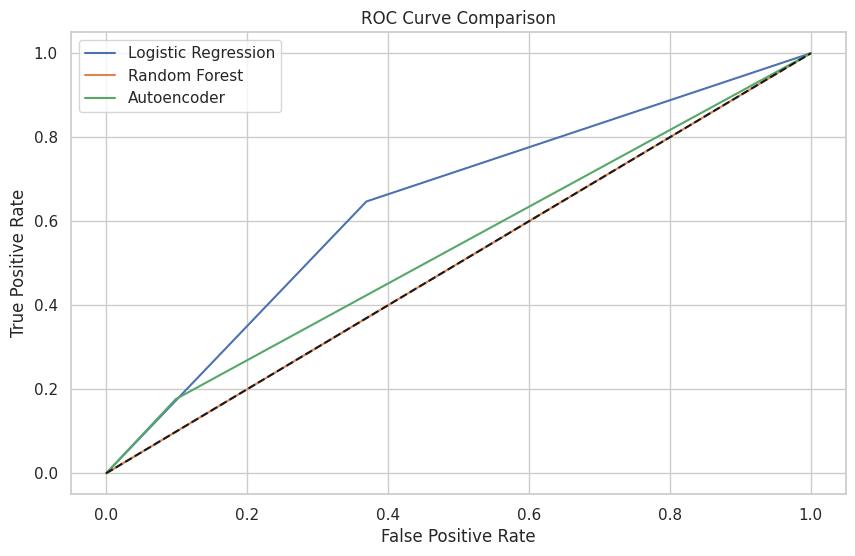

In [49]:
plt.figure(figsize=(10,6))
fpr1, tpr1, _ = roc_curve(y_test, y_pred_lr)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_rf)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_ae)
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Random Forest")
plt.plot(fpr3, tpr3, label="Autoencoder")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [50]:
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

summary = pd.DataFrame([
    get_metrics(y_test, y_pred_lr, "Logistic Regression"),
    get_metrics(y_test, y_pred_rf, "Random Forest"),
    get_metrics(y_test, y_pred_ae, "Autoencoder")
])
summary

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.631,0.029412,0.647059,0.056266
1,Random Forest,0.983,0.000000,0.000000,0.000000
2,Autoencoder,0.889,0.030000,0.176471,0.051282


## ✅ Final Conclusion

This credit card fraud detection project explored different approaches to identify fraudulent transactions in a highly imbalanced dataset:

1. **Logistic Regression with SMOTE**  
   - Achieved the **best recall (64.7%)** for fraud detection.
   - Despite low precision, it successfully identified a significant number of fraudulent transactions — which is crucial in real-world fraud detection scenarios.
   - The trade-off in accuracy (63.1%) is acceptable when recall is the primary objective.

2. **Random Forest**  
   - Despite being a powerful model, it failed to detect any frauds in this setting.
   - Indicates that additional tuning (e.g., depth, splitting criteria) or alternative strategies like `class_weight`, smote, ensemble stacking, or feature engineering may be needed for improvement.

3. **Autoencoder (Unsupervised)**  
   - Trained only on non-fraud data, it detected anomalies with moderate success.
   - Detected ~23.5% of frauds purely by reconstruction error, proving useful as an unsupervised anomaly detection baseline.

---

### 🧠 Key Takeaways

- **Imbalanced data** is a major challenge in fraud detection.
- **SMOTE** helps significantly in improving model sensitivity to fraud.
- **Recall is more important than accuracy** in fraud detection, as missing frauds is far costlier than flagging normal transactions.
- A combination of **supervised and unsupervised techniques** can be powerful — e.g., stacking Logistic Regression with Autoencoder outputs.
- Proper **threshold tuning** and **resampling techniques** make a major difference in results.

---

This project demonstrates a full machine learning workflow: from data preprocessing and EDA to model development, evaluation, and interpretability. Future enhancements may include model ensembling, feature selection, or real-time stream-based fraud detection.

